In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
####CHECK MISSING VALUES
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
###Checking Duplicates
df.duplicated().sum()

0

In [5]:
##Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#### Checking the number of unique values of each column\
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
#### Check statistics of dataset

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

From above description of numerical data , all means are very close to each other - between 66 and 68.05
All standard deviations are also close between 14.6 and 15.19
While there is a minimum score 0 , for writing minimum is much higher = 10 and reading might be 17.


In [8]:
print("Categories in gender variables: ", end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity variables: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education variables : ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variables: ", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variables: ", end=" ")
print(df['test_preparation_course'].unique())


Categories in gender variables:  ['female' 'male']
Categories in race/ethnicity variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variables :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variables:  ['standard' 'free/reduced']
Categories in test preparation course variables:  ['none' 'completed']


In [9]:
#define numerical and categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype== 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for Total Score and Average

In [10]:
df['total_score']= df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score']== 100]['average'].count()
writing_full = df[df['writing_score']== 100]['average'].count()
math_full = df[df['math_score']== 100]['average'].count()

print(f" No of students who have scored full marks in Maths: {math_full}")
print(f" No of students who have scored full marks in Writing: {writing_full}")
print(f" No of students who have scored full marks in Reading: {reading_full}")

 No of students who have scored full marks in Maths: 7
 No of students who have scored full marks in Writing: 14
 No of students who have scored full marks in Reading: 17


In [17]:
reading_less_than_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_than_20 = df[df['writing_score'] <=20]['average'].count()
math_less_than_20 = df[df['math_score'] <= 20]['average'].count()

print(f" No of students who have scored full marks in Maths: {math_less_than_20}")
print(f" No of students who have scored full marks in Writing: {writing_less_than_20}")
print(f" No of students who have scored full marks in Reading: {reading_less_than_20}")

 No of students who have scored full marks in Maths: 4
 No of students who have scored full marks in Writing: 3
 No of students who have scored full marks in Reading: 1


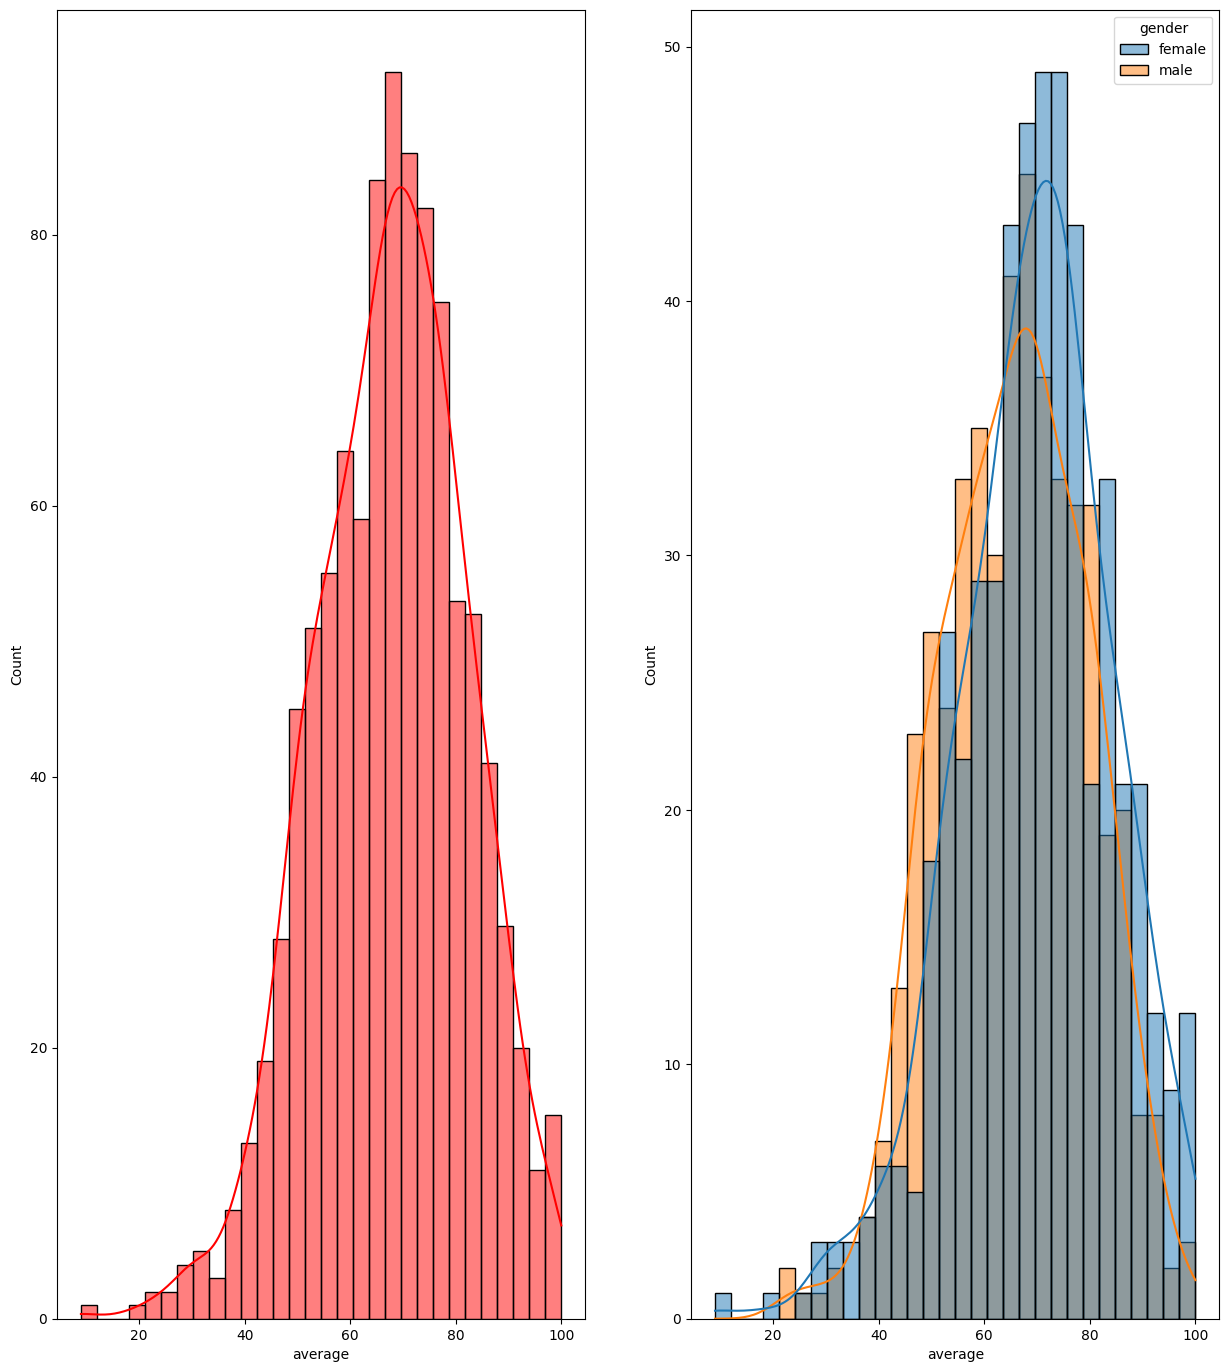

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,17))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

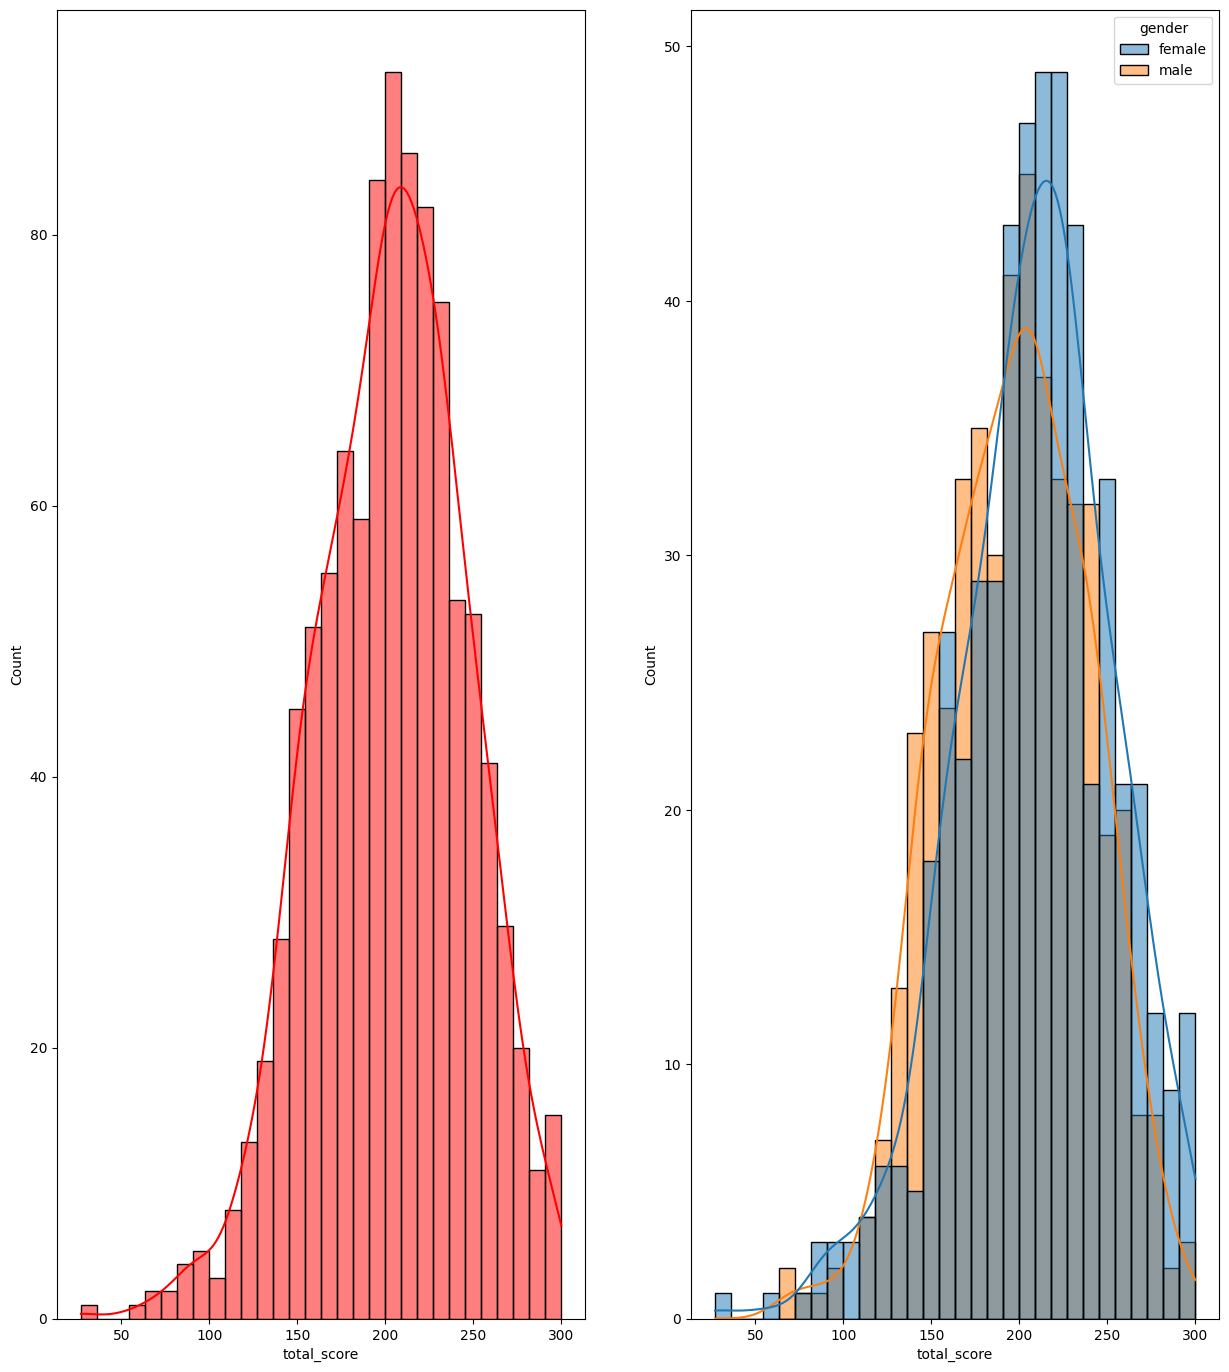

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,17))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')
plt.show()